In [16]:
import numpy as np
import sympy as sp
from IPython.display import display
import matplotlib as mpl
mpl.rcParams["figure.dpi"] = 480
mpl.rcParams["text.usetex"] = True
mpl.rcParams["font.family"] = "serrif"
import matplotlib.pyplot as plt
sp.init_printing()
import pandas as pd
import pyPLUTO as pp
from matplotlib import colors, cm
import bachelorproject as bp

L0 = 14959789200000.0 # 1 code unit of length in centimeter
v0 = 1e5 # 1 code unit of velocity in cm/s
t0 = L0/v0 # 1 code unit of time in seconds
rho0 = 1

units = bp.units()

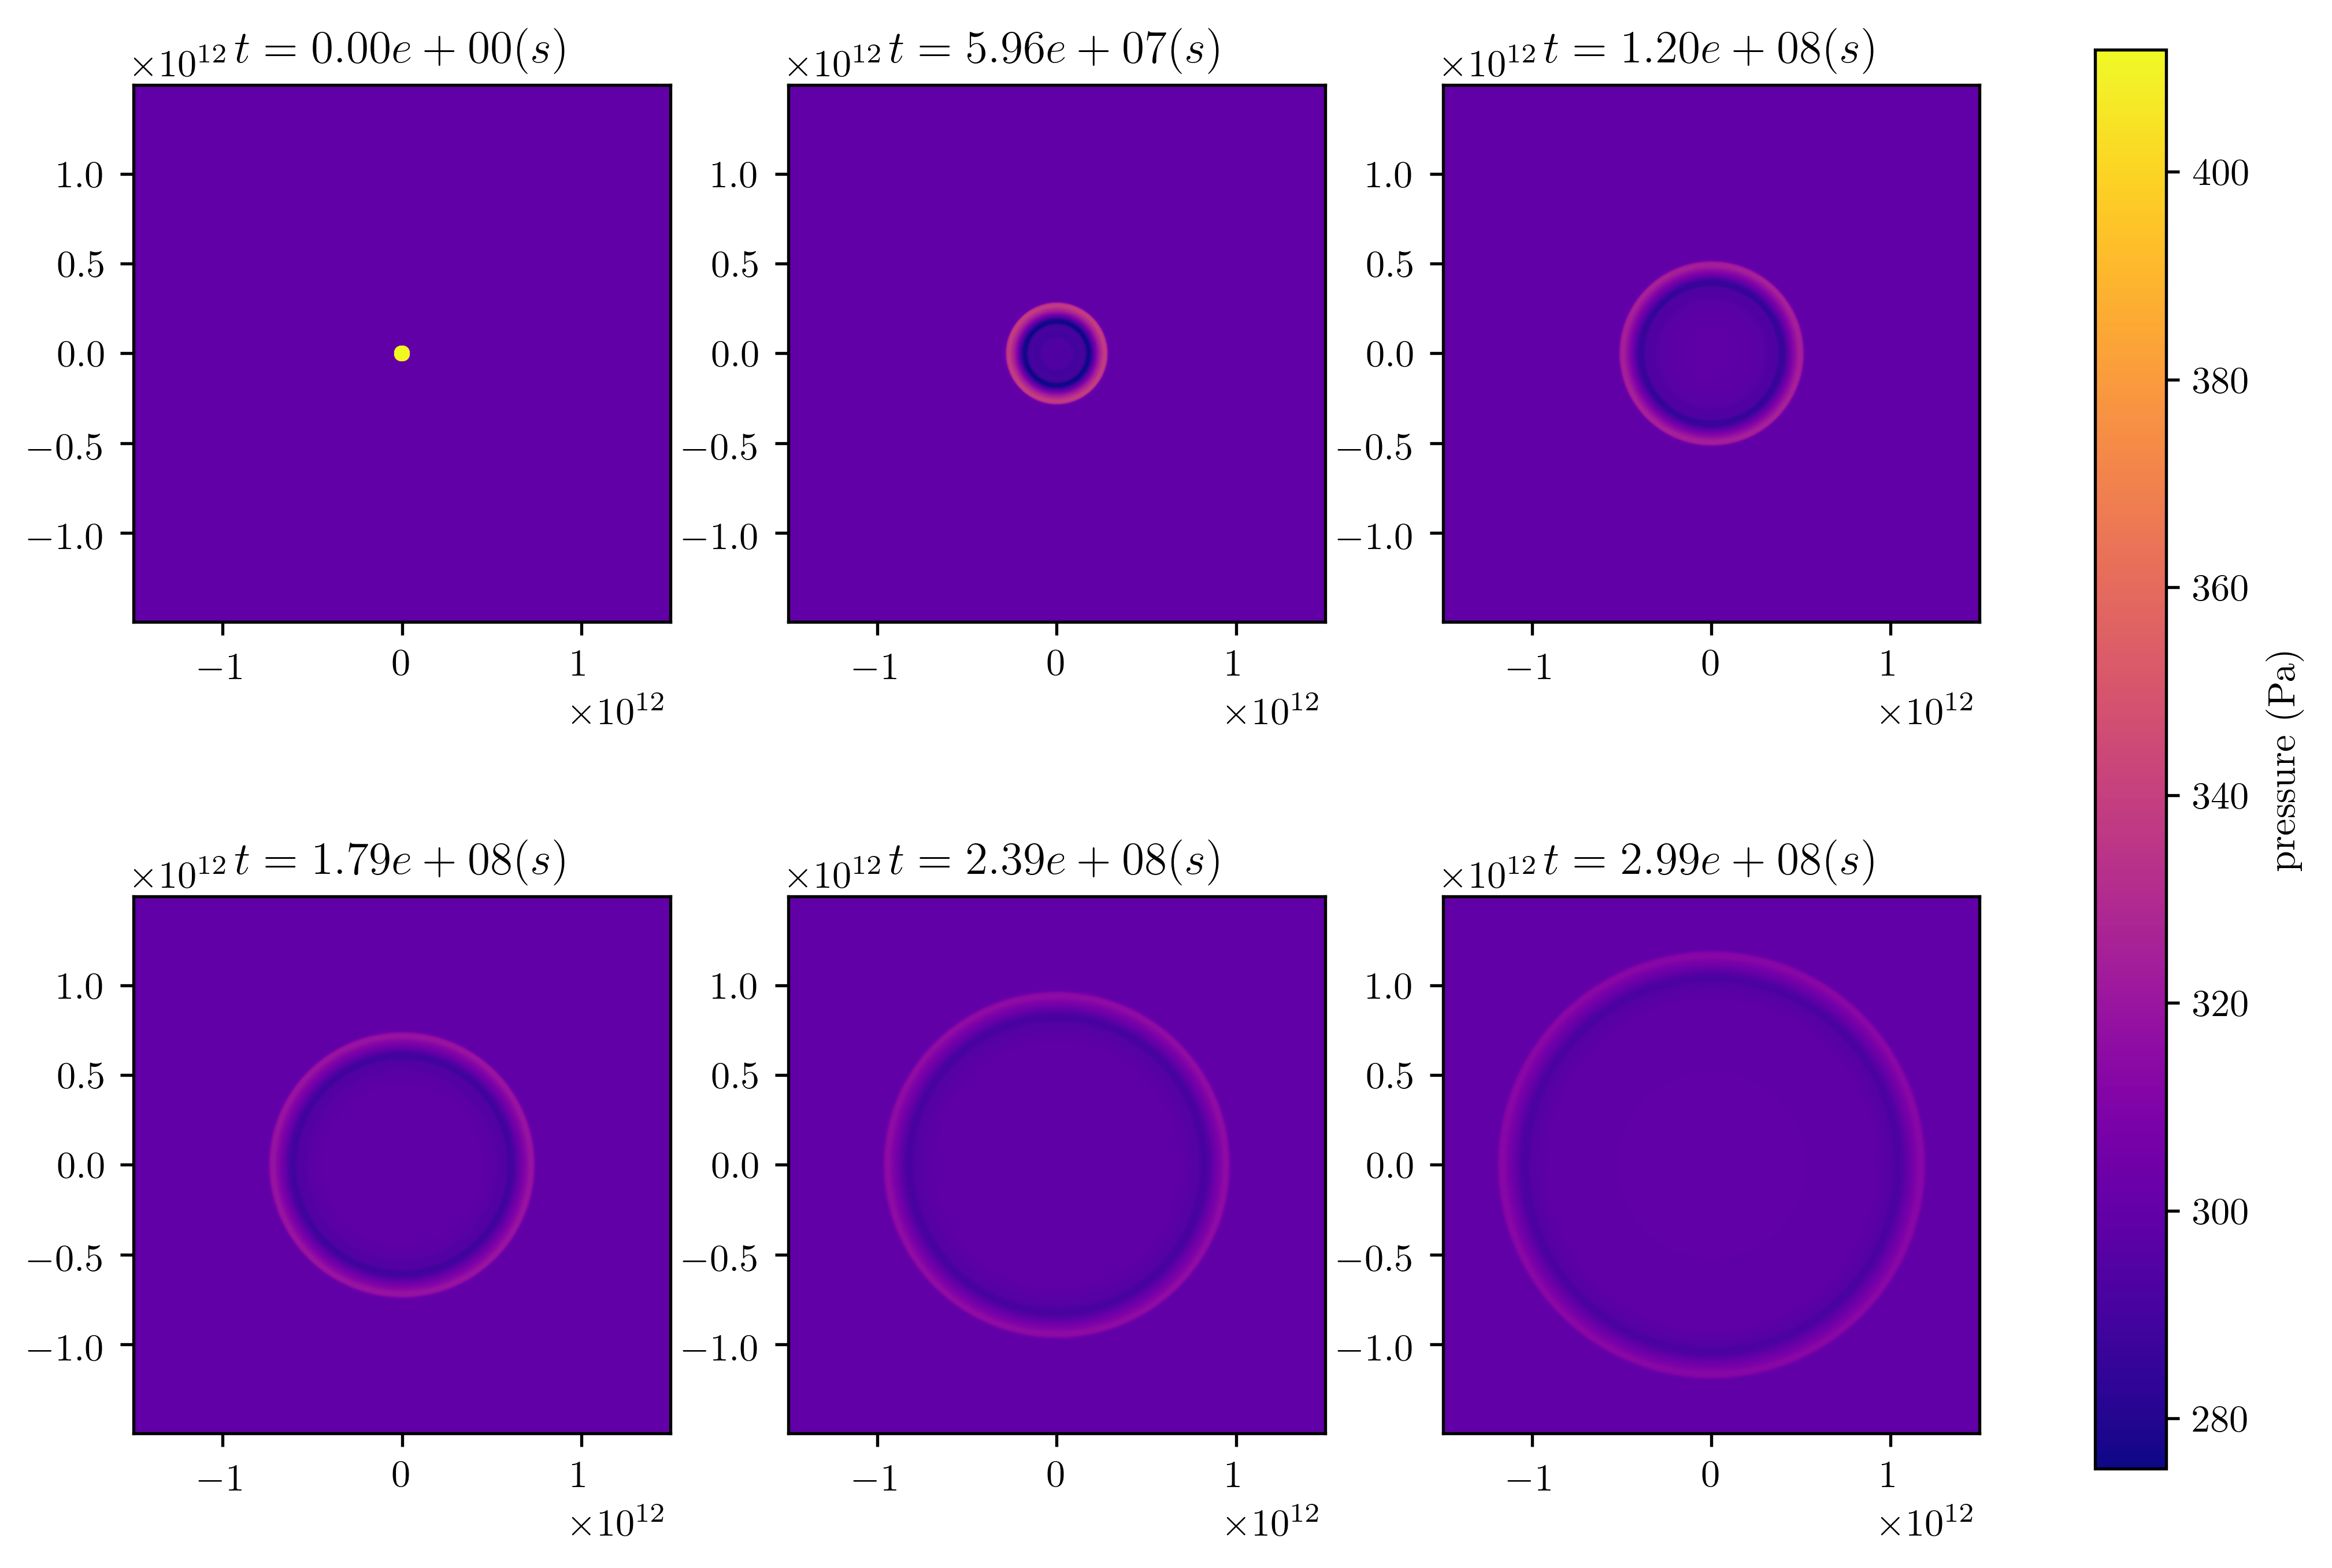

In [3]:
# Time evolution figure

j = 200
T = list(map(lambda t: int(j*t/5), range(6)))
fig, ax, = plt.subplots(2,3, figsize = (9,6))

images = [pp.pload(t, "../pluto-definitions/blastwave_HD/out/") for t in T]
im = [0]*6

vmin = min(image.prs.min() for image in images)
# vmax = max(image.prs.max() for image in images)
vmax = 11
norm = colors.Normalize(vmin=vmin, vmax=vmax)
norm_true = colors.Normalize(vmin=vmin*units.UNIT_PRESSURE*0.1, vmax=vmax*units.UNIT_PRESSURE*0.1)

for i in range(6):
    axis = ax[i//3][i%3]
    t = T[i]
    frame = images[i]
    im[i] = bp.plot(axis, frame.prs, frame, norm=norm)
    # im[i] = axis.imshow(frame.prs, norm=norm, cmap=cm.plasma)
    axis.set_title("$t = {:.2e} (s)$".format(frame.SimTime*t0))
fig.tight_layout()
fig.colorbar(cm.ScalarMappable(norm=norm_true, cmap=cm.plasma), ax  = ax, label = "pressure (Pa)")
fig.savefig("../report/figures/blast_wave.pdf")

In [4]:
def radius(img):
    domainsize = len(img)
    background_prs = img[0,0]
    wave_position = np.zeros(domainsize)
    center_line = img[domainsize//2]
    wave  = center_line > background_prs*1.01
    j = 0
    while not wave[j]:
        j += 1
    return domainsize//2 - j

In [5]:
R = np.zeros(201)
t = np.zeros(201)
for i in range(201):
    frame = pp.pload(i, "../pluto-definitions/blastwave_HD/out/")
    R[i] = radius(frame.prs)*frame.dx1[0]
    t[i] = frame.SimTime

findfont: Font family ['serrif'] not found. Falling back to DejaVu Sans.


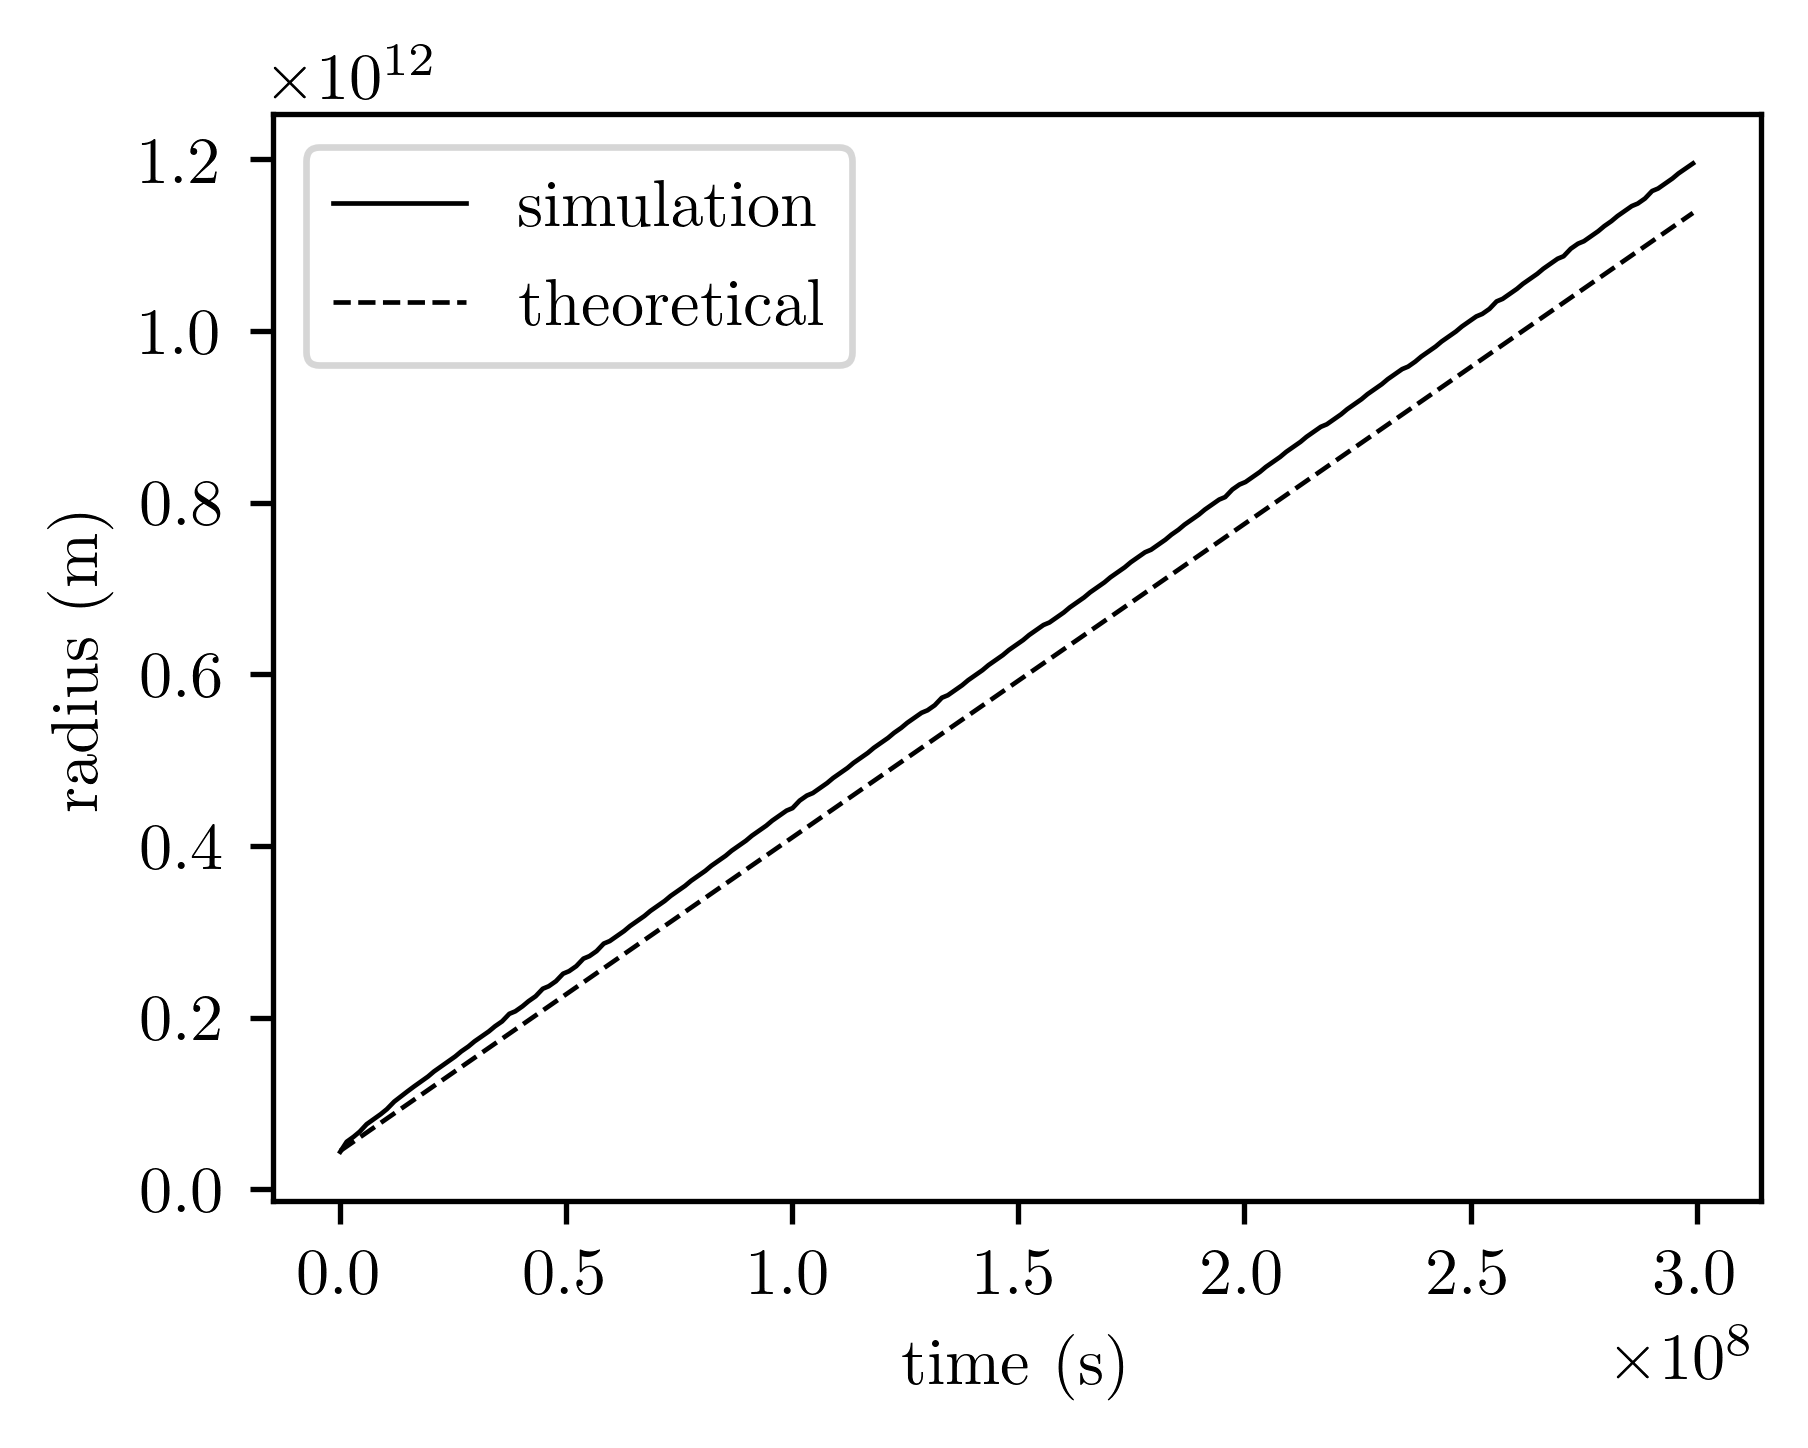

In [6]:
plt.figure(figsize=(4,3))
plt.plot(t*t0, R*L0*0.01, "k", linewidth=0.7,label = "simulation")
plt.xlabel("time (s)")
plt.ylabel("radius (m)")
plt.plot(t*t0, (np.sqrt(5/3*8) *t + 0.3)*L0*0.01, "--k", linewidth = 0.7,label = "theoretical")
plt.legend()
plt.savefig("../report/figures/wavefront_position.pdf")

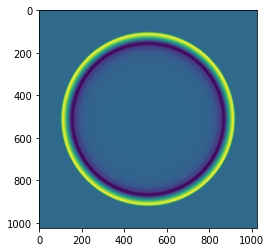

In [16]:
i = 200
frame = pp.pload(i, "../pluto-definitions/blastwave-lowpress/out/")
plt.imshow(frame.prs)

# Non linear effects

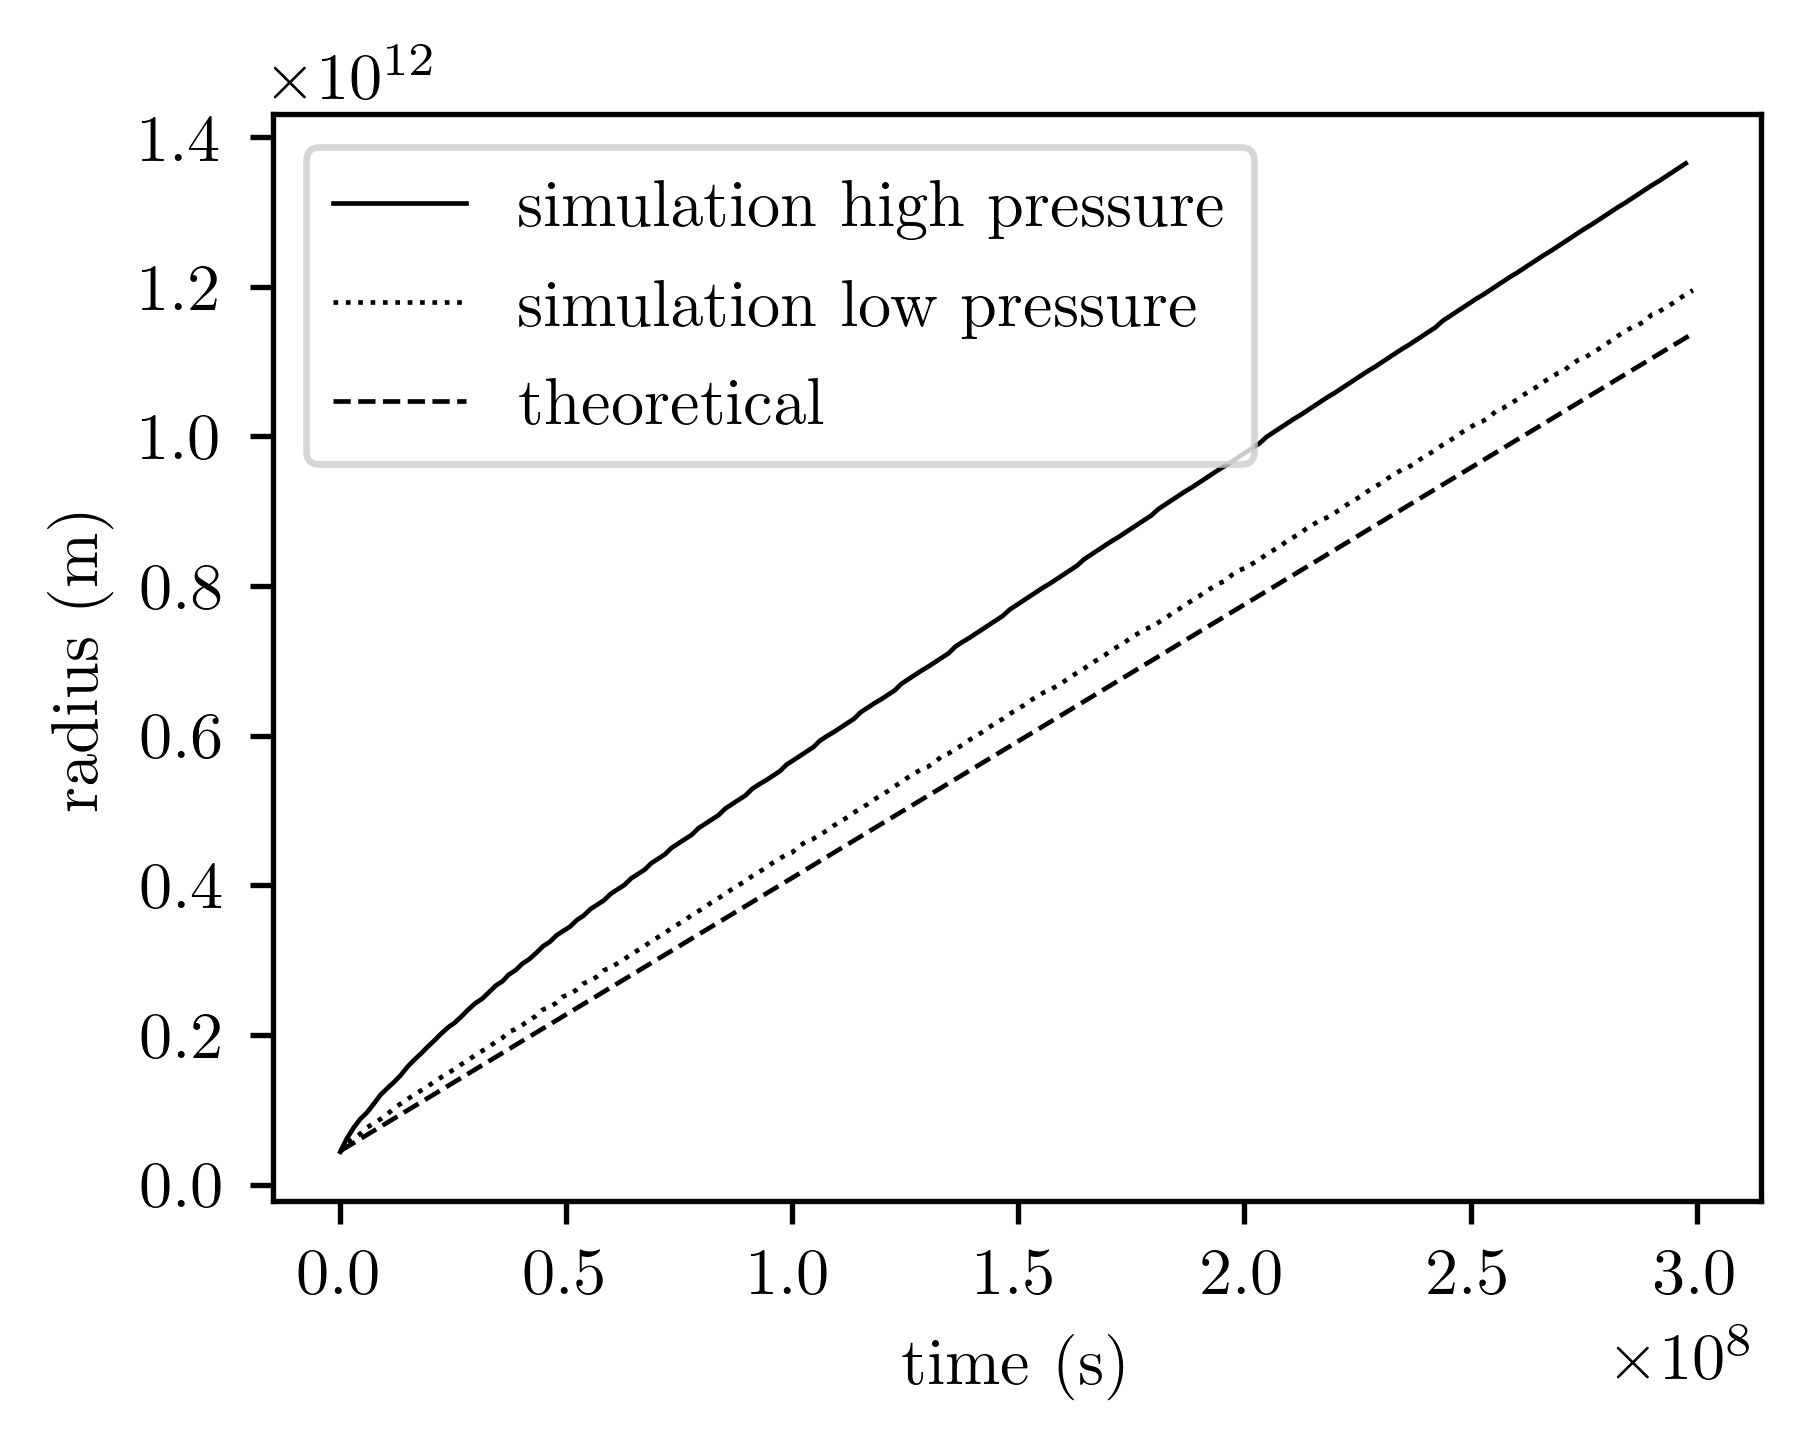

In [7]:
plt.figure(figsize=(4,3))
R_h = np.zeros(200)
t_h = np.zeros(200)
for i in range(200):
    frame = pp.pload(i, "../pluto-definitions/blastwave_HD/highpress/")
    R_h[i] = radius(frame.prs)*frame.dx1[0]
    t_h[i] = frame.SimTime
plt.xlabel("time (s)")
plt.ylabel("radius (m)")
plt.plot(t_h*t0, R_h*L0*0.01, "k", linewidth=0.7,label = "simulation high pressure")
plt.plot(t*t0, R*L0*0.01, ":k", linewidth=0.7,label = "simulation low pressure")
plt.plot(t*t0, (np.sqrt(5/3*8) *t + 0.3)*L0*0.01, "--k", linewidth=0.7,label = "theoretical")
plt.legend()
plt.savefig("../report/figures/non_linear_effects.pdf")

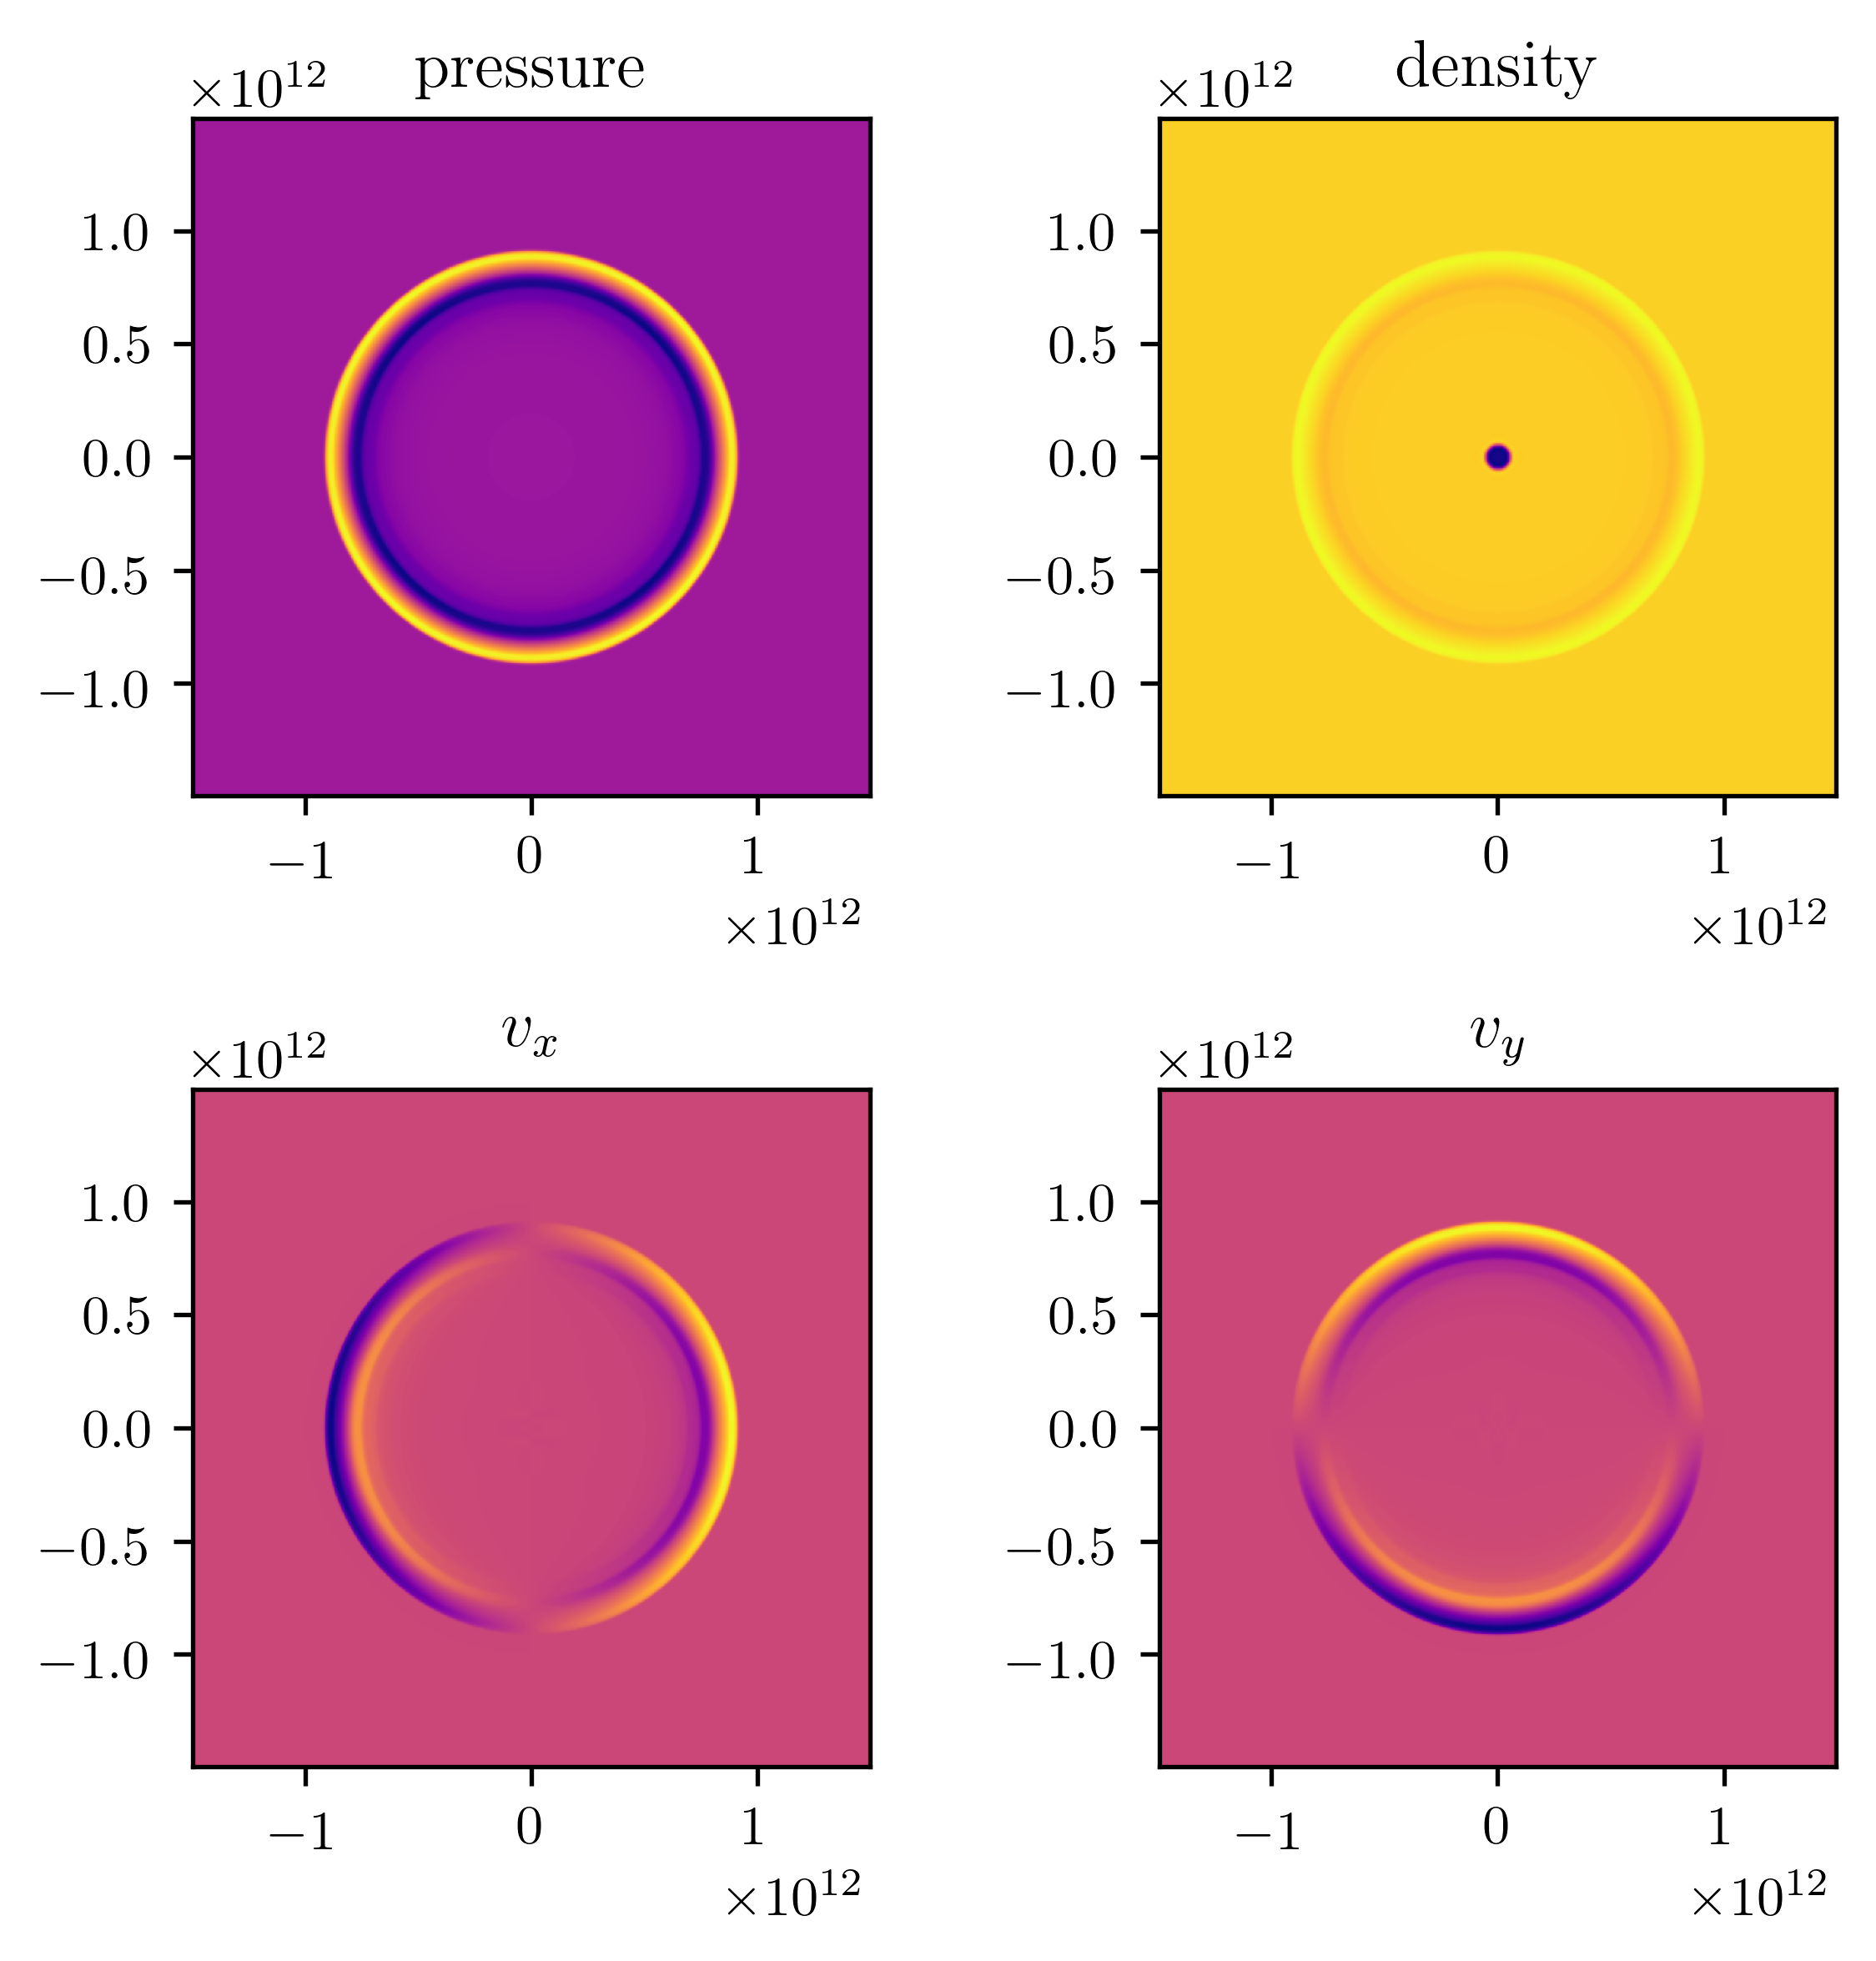

In [18]:
# Time evolution figure

t = 150
# T = list(map(lambda t: int(j*t/5), range(6)))
fig, ax, = plt.subplots(2,2, figsize = (5,5))

image = pp.pload(150, "../pluto-definitions/blastwave_HD/out/")
im = [0]*6
types = [image.prs, image.rho, image.vx1, image.vx2]
titles = ["pressure", "density", "$v_x$", "$v_y$"]
for i in range(4):
    axis = ax[i//2][i%2]
    im[i] = bp.plot(axis, types[i] , image)
    # im[i] = axis.imshow(frame.prs, norm=norm, cmap=cm.plasma)
    axis.set_title(titles[i])
fig.tight_layout()
# fig.colorbar(cm.ScalarMappable(norm=norm_true, cmap=cm.plasma), ax  = ax, label = "pressure (Pa)")
fig.savefig("../presentation/figures/output.pdf")

In [5]:
image = pp.pload(150, "../pluto-definitions/blastwave_HD/out/")
image.vx1

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])